# NO Show Appointment project

# Questions to be answerd 

Q1- what is the ovar all attendance persentage  ?

Q2 -effection of SMS recived on Patient attendance  ?

Q3- dose ppl with more age are most likely to attend the appointment  ?

Q4- effection of gender on Patient attendance ?

Q5- the relasion of having diseases on attendance ?

Q6- effection of other factors 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')

In [2]:
# to see the first 2 rows of my data
df.head(2)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No


In [3]:
def percentage(m0,m0t,m1,m1t):
    
    ''' this function is  to calculate the required missing percentage 
inputs you give the function 4 values 
m0  = No_of_0_factor_missed  (factor) any factor of the data set 
m0t = total_No_of_0_factor 
m1  = No_of_1_factor_missed
m1t = total_No_of_1_factor

output fuction return tow values

x1 = percentage  of_0_factor_missed 
x2 =  percentage of_1_factor_missed '''
    
    percentage_of_0_missed = int((m0/m0t)*100)
    percentage_of_1_missed = int((m1/m1t)*100)
    
    return ( percentage_of_0_missed , percentage_of_1_missed)

In [4]:
#to see some info about data like type of data in every column and number of  no nul values 
#its seams that we dont have nul  values in our data 
df.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


# data cleaning  
 removing duplicated rows and null values 

#to get number of duplicated raw (no need to remove any thing as  our duplicated rows = zero )

In [5]:
df.duplicated().sum().sum()

0

#to get the number of null values in our data set  (no need to remove any thing )

In [6]:
df.isnull().sum().sum()

0

#i need to make all columns name lower case so i dont need to remember which is uper and lower so i prefere to do this 
#also i found out that in no-show ther was - and as we learn in naming good practise to use _ instead of - so i change it 

In [7]:
df.rename(columns=lambda x: x.strip().lower().replace("-", "_"), inplace=True)
df.head(2)

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No


conferm that every thing is lower case now and - replaced with _

In [8]:
df.columns

Index(['patientid', 'appointmentid', 'gender', 'scheduledday',
       'appointmentday', 'age', 'neighbourhood', 'scholarship', 'hipertension',
       'diabetes', 'alcoholism', 'handcap', 'sms_received', 'no_show'],
      dtype='object')

i saw some columns name are hard to read and some having typing mistakes so i will correct it 
fixing spelling problems in {handcap ,hipertension} and unreadable name problem like {appointmentid} and use beter name to {scholarship} called {health_insurance}

In [9]:
df.rename(columns={'patientid':'patient_id', 'appointmentid':'appointment_id', 'scheduledday':'scheduled_day', 'appointmentday':
                  'appointment_day', 'scholarship':'health_insurance', 'hipertension':'hypertension', 'handcap':'handicap'},inplace=True)
df.head(2)

,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,neighbourhood,health_insurance,hypertension,diabetes,alcoholism,handicap,sms_received,no_show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No


deleting coloms that i will not need in my data investigation process 

In [10]:
df = df.drop(['patient_id', 'appointment_id', 'scheduled_day', 'appointment_day'], axis=1)

df.head(2)

,gender,age,neighbourhood,health_insurance,hypertension,diabetes,alcoholism,handicap,sms_received,no_show
0,F,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,56,JARDIM DA PENHA,0,0,0,0,0,0,No


save new datasets in case we lost data as hold point to work with next day 

In [11]:
df.to_csv('no_show_clean_1.csv', index=False)

In [12]:
df.describe()

,age,health_insurance,hypertension,diabetes,alcoholism,handicap,sms_received
count,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


we need to remove the age -1 and age 0  and replace it with the mean value 

In [13]:
df['age'].replace([0,-1],[(df.age.mean()),(df.age.mean())], inplace=True)

confirm that ther is no 0 or (-) negative  values in age columns any more 

In [14]:
df_0_new = df.query('age <= 0')
df_0_new.head()

,gender,age,neighbourhood,health_insurance,hypertension,diabetes,alcoholism,handicap,sms_received,no_show


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   gender            110527 non-null  object 
 1   age               110527 non-null  float64
 2   neighbourhood     110527 non-null  object 
 3   health_insurance  110527 non-null  int64  
 4   hypertension      110527 non-null  int64  
 5   diabetes          110527 non-null  int64  
 6   alcoholism        110527 non-null  int64  
 7   handicap          110527 non-null  int64  
 8   sms_received      110527 non-null  int64  
 9   no_show           110527 non-null  object 
dtypes: float64(1), int64(6), object(3)
memory usage: 8.4+ MB


In [16]:
df.head()

,gender,age,neighbourhood,health_insurance,hypertension,diabetes,alcoholism,handicap,sms_received,no_show
0,F,62.0,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,56.0,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,62.0,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,8.0,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,56.0,JARDIM DA PENHA,0,1,1,0,0,0,No


Exploratory Data Analysis

# Q1- answer 

we first need to knew how many ppl attend and how many ppl missed ther appointment to answer our first qeustion 


In [17]:
df.no_show.value_counts()

No     88208
Yes    22319
Name: no_show, dtype: int64

creat mask of attend(no_show == No)  and missed (no_show==Yes) because it confuse me alittle bit

In [18]:
attend = df[df['no_show'] == 'No']
missed = df[df['no_show'] == 'Yes']

attend.count().unique()[0]

88208

In [19]:
missed.count().unique()[0]

22319

we have more ppl attend than not attended 

In [20]:
attend.head()

,gender,age,neighbourhood,health_insurance,hypertension,diabetes,alcoholism,handicap,sms_received,no_show
0,F,62.0,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,56.0,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,62.0,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,8.0,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,56.0,JARDIM DA PENHA,0,1,1,0,0,0,No


In [21]:
missed.head()

,gender,age,neighbourhood,health_insurance,hypertension,diabetes,alcoholism,handicap,sms_received,no_show
6,F,23.0,GOIABEIRAS,0,0,0,0,0,0,Yes
7,F,39.0,GOIABEIRAS,0,0,0,0,0,0,Yes
11,M,29.0,NOVA PALESTINA,0,0,0,0,0,1,Yes
17,F,40.0,CONQUISTA,1,0,0,0,0,0,Yes
20,F,30.0,NOVA PALESTINA,0,0,0,0,0,0,Yes


In [22]:
attendance_percentage = ( attend.count().unique()[0] / (attend.count().unique()[0] + missed.count().unique()[0]) ) *100
attendance_percentage

79.8067440534892

In [23]:
missed_percentage = 100 - attendance_percentage
missed_percentage

20.193255946510803

only 21% missed ther appointments 

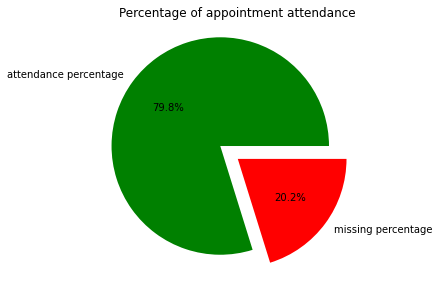

In [24]:
plt.figure(figsize=(5,5))
df_attendance_percentage = [attendance_percentage, missed_percentage]
label_attendance = ['attendance percentage','missing percentage',]
distance = [0.2,0]
colo = ['green', 'red']
plt.pie(df_attendance_percentage , labels = label_attendance, explode= distance, autopct ='%2.1f%%', colors = colo)
plt.title('Percentage of appointment attendance')
plt.show();

In [25]:
df.to_csv('no_show_clean2.csv', index=False) 

save  data to continue 2moro 

plot data as per case study 2 section 13- conclusiona and visualize

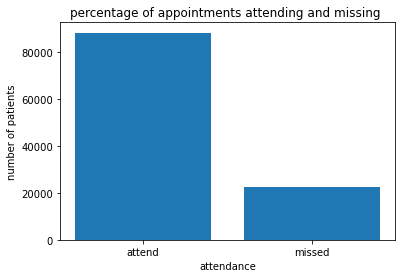

In [26]:
locations = [1, 2] 
heights = [attend.count().unique()[0], missed.count().unique()[0]]
labels = ['attend', 'missed']
plt.bar(locations, heights, tick_label=labels)
plt.title('percentage of appointments attending and missing ')
plt.xlabel('attendance')
plt.ylabel('number of patients');

# Q2 / answer 

Q2 -effection of SMS recived on Patient attendance  ?

In [27]:
attend_without_sms = attend.query('sms_received == 0').no_show.count()
attend_without_sms

62510

In [28]:
attend_with_sms = attend.query('sms_received == 1').no_show.count()
attend_with_sms

25698

conferm the above numbers  as we can see ther is 62510 patients attend without recive sms and 25698 attend after recive sms 
that mean reciving sms is not so effective in this case 

In [29]:
attend.groupby('sms_received').no_show.count()

sms_received
0    62510
1    25698
Name: no_show, dtype: int64

In [30]:
missed.groupby('sms_received').no_show.count()

sms_received
0    12535
1     9784
Name: no_show, dtype: int64

In [31]:
missed_without_sms = missed.query('sms_received == 0').no_show.count()
missed_without_sms

12535

In [32]:
missed_with_sms = missed.query('sms_received == 1').no_show.count()
missed_with_sms

9784

as we can see here ther is total number of 12535 patients missed ther appointment because thay dont recive sms and 9784 recived the sms and thay still not attend also that mean ther is no effect of reciving sms on missing the appointment 


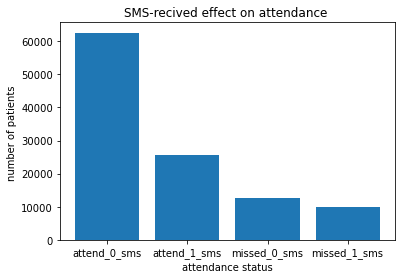

In [33]:
locations = [1,2,3,4] 
heights = [attend_without_sms, attend_with_sms, missed_without_sms, missed_with_sms ]
labels = ['attend_0_sms', 'attend_1_sms','missed_0_sms' ,'missed_1_sms']
plt.bar(locations, heights, tick_label=labels)
plt.title('SMS-recived effect on attendance ')
plt.xlabel('attendance status')
plt.ylabel('number of patients ');

ther is astrange effect here most of the ppl who attend didnt recived amassage while the normal is to have higher chance to go to the appointment if you recived massage about appointment date to remind you 

# Q3. answer 
dose age effect attendance ?

In [34]:
youth_attendance = attend.query('age <= 50').count().unique()[0]
old_attendance = attend.query('age > 50').count().unique()[0]

In [35]:
old_attendance

29696

In [36]:
youth_attendance

58512

In [37]:
total_No_of_yoth = df.query('age <= 50').count().unique()[0]

youth_attendance_percentage = (youth_attendance /(total_No_of_yoth)) *100
youth_attendance_percentage

77.90796761823606

In [38]:
total_No_of_old = df.query('age > 50').count().unique()[0] 
old_attendacne_percentage = (old_attendance /(total_No_of_old)) *100
old_attendacne_percentage

83.83253818140756

as we see old patients who has age more than 50 years old have slightly more percantage of attendance than youth patients according to ther proportion in the given dataset by 7 % more 

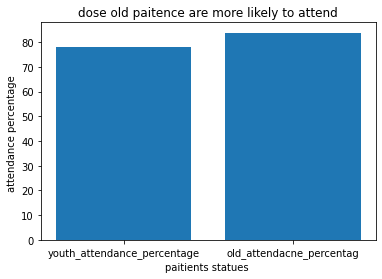

In [39]:
locations = [1,2] 
heights = [youth_attendance_percentage , old_attendacne_percentage ]
labels = ['youth_attendance_percentage', 'old_attendacne_percentag']
plt.bar(locations, heights, tick_label=labels)
plt.title('dose old paitence are more likely to attend')
plt.xlabel('paitients statues ')
plt.ylabel('attendance percentage ');

# Q4 answer 

dose gender effect attendance ?

In [40]:
no_of_gender_attend  = attend.groupby('gender').no_show.count()
no_of_gender_attend

gender
F    57246
M    30962
Name: no_show, dtype: int64

In [41]:
no_of_male_attend  = attend.query('gender == "M" ').count().unique()[0]
no_of_male_attend

30962

In [42]:
no_of_male_missed = missed.query('gender == "M" ').count().unique()[0]
no_of_male_missed

7725

In [43]:
no_of_femel_attend  = attend.query('gender == "F" ').count().unique()[0]
no_of_femel_attend

57246

In [44]:
no_of_femel_missed = missed.query('gender == "F" ').count().unique()[0]
no_of_femel_missed

14594

In [45]:
femel_percentage_of_attend = no_of_femel_attend /(no_of_femel_attend + no_of_femel_missed)*100
femel_percentage_of_attend

79.68541202672606

In [46]:
male_percentage_of_attend = no_of_male_attend /(no_of_male_attend + no_of_male_missed)*100
male_percentage_of_attend

80.03205211052808

we see that ther is slightly diferance in attendance persentage between male and femel which dose not effect attendance 

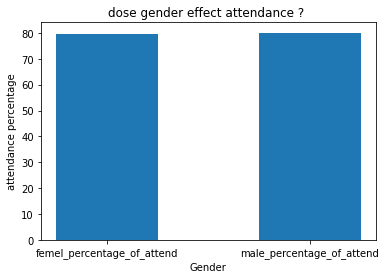

In [47]:
locations = [1,2] 
heights = [femel_percentage_of_attend , male_percentage_of_attend ]
labels = ['femel_percentage_of_attend', 'male_percentage_of_attend']
plt.bar(locations, heights, tick_label=labels , width= 0.5)
plt.title('dose gender effect attendance ? ')
plt.xlabel('Gender')
plt.ylabel('attendance percentage');

as we can see that ther is no relation between gender and attend or not attended to the appointment 

# Q5 /answer 

dose desieces effect attendance ?

hypertension / diabetes	/ handicap

# hypertension

In [48]:
no_of_hypertension_attend  = attend.groupby('hypertension').no_show.count()
no_of_hypertension_attend

hypertension
0    70179
1    18029
Name: no_show, dtype: int64

In [49]:
No_0_hypertention_attend = attend.query(' hypertension == 0 ').count().unique()[0]
No_0_hypertention_attend

70179

In [50]:
No_0_hypertention_missed = missed.query(' hypertension == 0 ').count().unique()[0]
No_0_hypertention_missed

18547

In [51]:
No_1_hypertention_attend = attend.query(' hypertension == 1 ').count().unique()[0]
No_1_hypertention_attend

18029

In [52]:
No_1_hypertention_missed = missed.query(' hypertension == 1 ').count().unique()[0]
No_1_hypertention_missed

3772

In [53]:
percentage_1_hypertention_missed = No_1_hypertention_missed / (No_1_hypertention_missed + No_1_hypertention_attend)*100
percentage_1_hypertention_missed

17.301958625751112

In [54]:
percentage_0_hypertention_missed = No_0_hypertention_missed / (No_0_hypertention_missed + No_0_hypertention_attend) *100
percentage_0_hypertention_missed

20.903680995424114

having hypertension dose not effect attendance

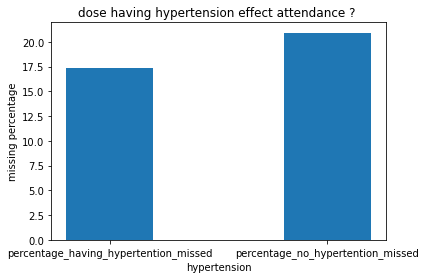

In [55]:
locations = [1,2] 
heights = [percentage_1_hypertention_missed , percentage_0_hypertention_missed ]
labels = ['percentage_having_hypertention_missed', 'percentage_no_hypertention_missed']
plt.bar(locations, heights, tick_label=labels , width= 0.4)
plt.title('dose having hypertension effect attendance ? ')
plt.xlabel('hypertension')
plt.ylabel('missing percentage');

we see that having hypertension is not effecting attendance ther is aslightly differance 


# diabetes

In [56]:
total_No_of_0_diapets = df.query('diabetes == 0').count().unique()[0]
total_No_of_0_diapets

102584

In [57]:
total_No_of_1_diapets = df.query('diabetes == 1').count().unique()[0]
total_No_of_1_diapets

7943

In [58]:
No_of_0_diapets_missed = missed.query('diabetes == 0').count().unique()[0]
No_of_0_diapets_missed

20889

In [59]:
No_of_1_diapets_missed = missed.query('diabetes == 1').count().unique()[0]
No_of_1_diapets_missed

1430

call the percentage fuction as per reviewer request 

In [60]:
missed_percentage = percentage(m0=No_of_0_diapets_missed, m0t=total_No_of_0_diapets, m1=No_of_1_diapets_missed,
                               m1t=total_No_of_1_diapets )
missed_percentage

(20, 18)

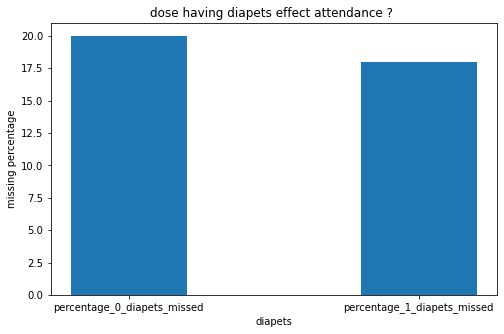

In [61]:
fig = plt.figure(figsize=(8,5))
locations = [1,2] 
heights = [20,18]
labels = ['percentage_0_diapets_missed', 'percentage_1_diapets_missed']
plt.bar(locations, heights, tick_label=labels , width= 0.4)
plt.title('dose having diapets effect attendance ? ')
plt.xlabel('diapets')
plt.ylabel('missing percentage');

also having diabetes dose not effect attendance 

# hadicap


In [62]:
no_of_1_handicap_missed  = missed.query('handicap in [1, 2, 3 ,4]').count().unique()[0]
no_of_1_handicap_missed

407

In [63]:
total_number_of_1_handicap = df.query('handicap in [1, 2, 3 ,4]').count().unique()[0]
total_number_of_1_handicap

2241

In [64]:
no_of_0_handicap_missed = missed.query('handicap == 0').count().unique()[0]
no_of_0_handicap_missed

21912

In [65]:
total_number_of_0_handicap =  df.query('handicap == 0 ').count().unique()[0]
total_number_of_0_handicap

108286

In [66]:
handicap_missed_percentage = percentage(m0=no_of_0_handicap_missed, m0t=total_number_of_0_handicap, m1=no_of_1_handicap_missed,
                               m1t=total_number_of_1_handicap)
handicap_missed_percentage

(20, 18)

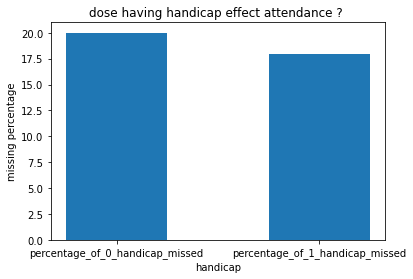

In [69]:
locations = [1,2] 
heights = [20 , 18 ]
labels = ['percentage_of_0_handicap_missed', 'percentage_of_1_handicap_missed']
plt.bar(locations, heights, tick_label=labels , width= 0.5)
plt.title('dose having handicap effect attendance ? ')
plt.xlabel('handicap')
plt.ylabel('missing percentage');

handicap dose not effect attendance

# Q6 answer 

other factors   

# alcoholism  / health_insurance	

# alchoholism

In [70]:
No_of_alcoholism_missed = missed.query('alcoholism == 1 ').count().unique()[0]

No_of_no_alcholism_missed = missed.query('alcoholism == 0').count().unique()[0]

total_No_of_alcholism = df.query('alcoholism == 1').count().unique()[0]

total_No_of_no_alcholism = df.query('alcoholism == 0').count().unique()[0]

percentage_of_alcholism_missed = (No_of_alcoholism_missed / total_No_of_alcholism) *100

percentage_of_no_alcholism_missed = (No_of_no_alcholism_missed / total_No_of_no_alcholism) *100

percentage_of_alcholism_missed.astype(int) , percentage_of_no_alcholism_missed.astype(int)

(20, 20)

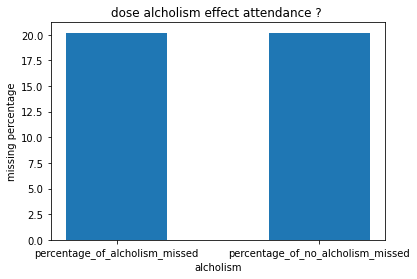

In [71]:
locations = [1,2] 
heights = [percentage_of_alcholism_missed , percentage_of_no_alcholism_missed ]
labels = ['percentage_of_alcholism_missed', 'percentage_of_no_alcholism_missed']
plt.bar(locations, heights, tick_label=labels , width= 0.5)
plt.title('dose alcholism effect attendance ? ')
plt.xlabel('alcholism')
plt.ylabel('missing percentage');

alchol dose not effect attendance

# health_insurance

In [72]:
No_of_1_helth_insurance_missed = missed.query('health_insurance == 1').count().unique()[0]
No_of_1_helth_insurance_missed 

2578

In [73]:
No_of_0_helth_insurance_missed = missed.query('health_insurance == 0').count().unique()[0]
No_of_0_helth_insurance_missed

19741

In [74]:
total_No_of_1_helth_insurance = df.query('health_insurance == 1').count().unique()[0]
total_No_of_1_helth_insurance

10861

In [75]:
total_No_of_0_helth_insurance = df.query('health_insurance == 0').count().unique()[0]
total_No_of_0_helth_insurance

99666

In [76]:
percentage_of_0_helth_insurance_missed = No_of_0_helth_insurance_missed / total_No_of_0_helth_insurance *100
percentage_of_0_helth_insurance_missed.astype(int)

19

In [77]:
percentage_of_1_helth_insurance_missed = No_of_1_helth_insurance_missed / total_No_of_1_helth_insurance *100
percentage_of_1_helth_insurance_missed.astype(int)

23

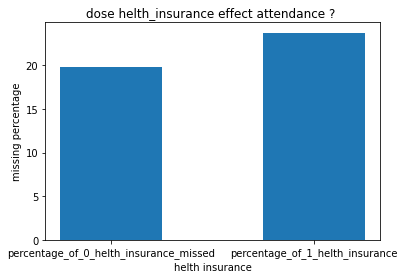

In [78]:
locations = [1,2] 
heights = [percentage_of_0_helth_insurance_missed , percentage_of_1_helth_insurance_missed ]
labels = ['percentage_of_0_helth_insurance_missed', 'percentage_of_1_helth_insurance']
plt.bar(locations, heights, tick_label=labels , width= 0.5)
plt.title('dose helth_insurance effect attendance ? ')
plt.xlabel('helth insurance')
plt.ylabel('missing percentage');

we can see that ppl who has helth insurance are 4 % more likely to missed the appointments 

# Conclusions


we can see that there are more ppl attend to there appointment than who missed it , which is a good thing
receiving SMS has a strange relationship as ppl who most attend didnt recive massages which i thought early it will be critical thing but the data is completly opisite 

old people are more accurate to attend their appointment by 7%

# limitation


most of the characteristics have a similar slightly effect which is not odd enough to detect like at the begining of the project 
i thought that reciving sms will be the most valuble way to make ppl attend the most but that was strange to me to 
have completly the opesit 